# Exploratory Data Analysis (EDA)

## Download and load data

Data was taken from this kaggle [page](https://www.kaggle.com/datasets/CooperUnion/cardataset).

In [ ]:
!pip install opendatasets

In [2]:
import opendatasets as od

import numpy as np
import pandas as pd
from scipy import stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns


od.download("https://www.kaggle.com/datasets/CooperUnion/cardataset/data")

In [59]:
car_data = pd.read_csv("cardataset/data.csv")
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Central Tendency

In [110]:
# Mean
car_data["city mpg"].mean()

19.73325499412456

In [111]:
# Trimmed Mean
stats.trim_mean(car_data["city mpg"], proportiontocut=.1)

18.717373059169116

In [112]:
# Weighted Mean
np.average(car_data["city mpg"], weights=car_data["Popularity"])

19.70644810974363

In [113]:
# Median
car_data["city mpg"].median()

18.0

In [58]:
# Weighted median
def median(a, weights=None):
    if weights is None:
        return np.median(a)

    a, weights = np.array(a).squeeze(), np.array(weights).squeeze()
    sorted_a, sorted_weights = map(np.array, zip(*sorted(zip(a, weights))))
    midpoint = sum(sorted_weights) / 2
    if any(weights > midpoint):
        return a[weights == np.max(weights)][0]

    cumsum = np.cumsum(sorted_weights)
    idx = np.where(cumsum >= midpoint)[0][0]
    if cumsum[idx] == midpoint:
        return np.mean(sorted_a[idx:idx+2])
    return sorted_a[idx+1]

median(car_data["city mpg"], weights=car_data["Popularity"])

18

In [61]:
# 99th percentile
np.percentile(car_data["city mpg"], 99)

44.0

In [64]:
car_data["city mpg"].describe()

count    11914.000000
mean        19.733255
std          8.987798
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max        137.000000
Name: city mpg, dtype: float64

## Estimated of Variability

In [67]:
# Variance
statistics.variance(car_data["city mpg"])

80.78051577027851

In [69]:
# Standard deviation
np.std(car_data["city mpg"])

8.987420957564412

In [73]:
# Mean absolute deviation
np.abs(car_data["city mpg"] - car_data["city mpg"].mean()).mean()

4.720302591604896

In [74]:
# Median absolute deviation from the median
np.abs(car_data["city mpg"] - car_data["city mpg"].median()).median()

3.0

In [75]:
# Range
car_data["city mpg"].max() - car_data["city mpg"].min()

130

In [76]:
# Interquartile range (IQR)
q3, q1 = np.percentile(car_data["city mpg"], [75, 25])
q3 - q1

6.0

## Exploring the Data Distribution

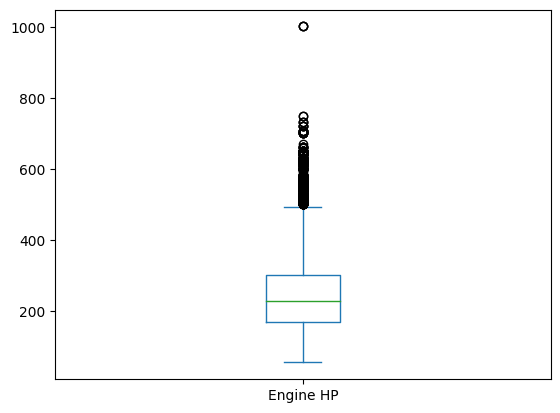

In [114]:
# Boxplot
car_data["Engine HP"].plot.box();

In [115]:
# Frequency table
pd.cut(car_data["Engine HP"], 10).value_counts().sort_index()

(54.054, 149.6]    1695
(149.6, 244.2]     4834
(244.2, 338.8]     3489
(338.8, 433.4]     1057
(433.4, 528.0]      407
(528.0, 622.6]      266
(622.6, 717.2]       85
(717.2, 811.8]        9
(811.8, 906.4]        0
(906.4, 1001.0]       3
Name: Engine HP, dtype: int64

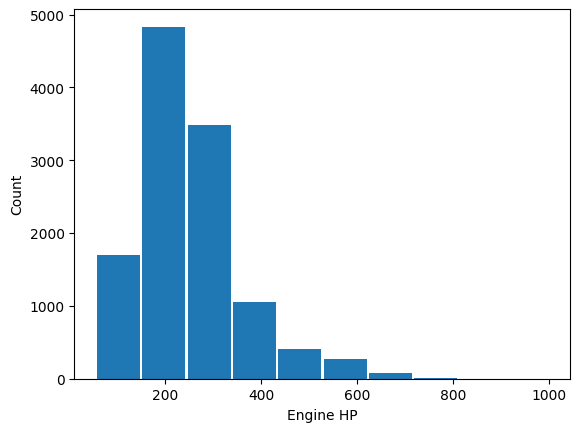

In [121]:
# Historgram
car_data["Engine HP"].plot.hist(bins=10, rwidth=.95)
plt.xlabel("Engine HP")
plt.ylabel("Count");

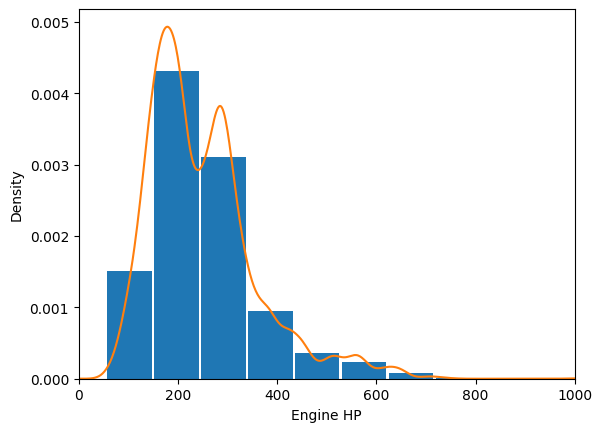

In [122]:
# Density plot
ax = car_data["Engine HP"].plot.hist(bins=10, xlim=[0, 1000], rwidth=.95, density=True)
car_data["Engine HP"].plot.density(ax=ax)
plt.xlabel("Engine HP");

## Exploring Binary and Categorical Data

In [123]:
# Mode
car_data["Transmission Type"].mode()

0    AUTOMATIC
Name: Transmission Type, dtype: object

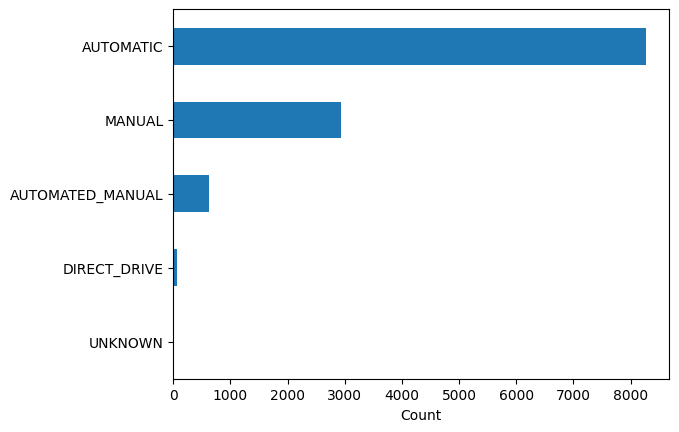

In [131]:
# Bar plot
car_data["Transmission Type"].value_counts(ascending=True).plot.barh()
plt.xlabel("Count");

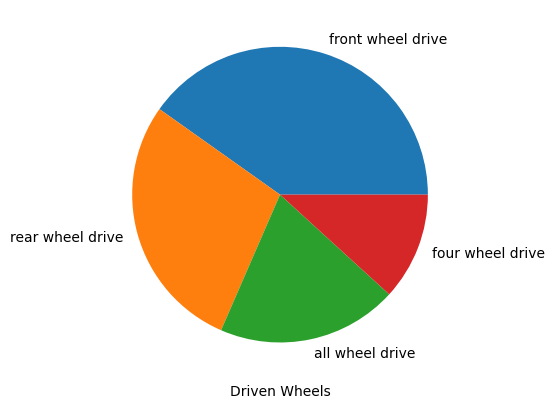

In [146]:
# Pie chart
car_data["Driven_Wheels"].value_counts().plot.pie()
plt.ylabel("")
plt.xlabel("Driven Wheels");

## Correlation

In [149]:
# Correlation matrix
car_data.corr(numeric_only=True)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


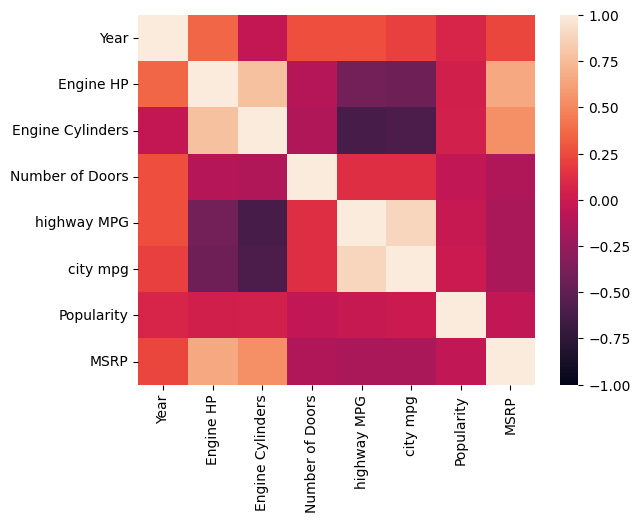

In [153]:
# Heatmap of correlation matrix (Pearson's)
sns.heatmap(car_data.corr(numeric_only=True), vmax=1, vmin=-1);

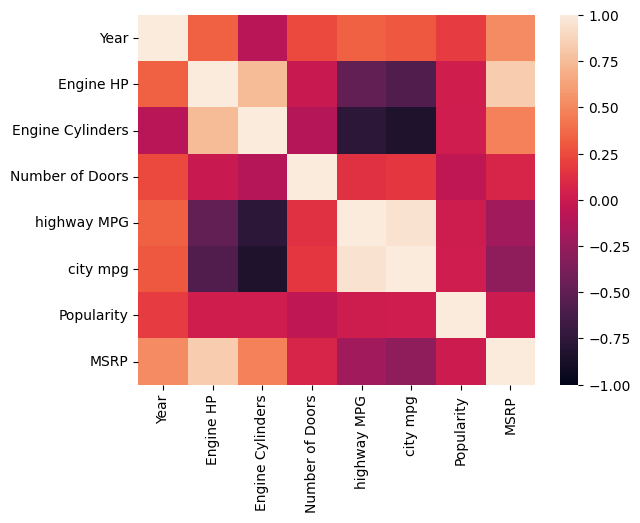

In [158]:
# Heatmap of correlation matrix (Spearman's)
sns.heatmap(car_data.corr(numeric_only=True, method='spearman'), vmax=1, vmin=-1);

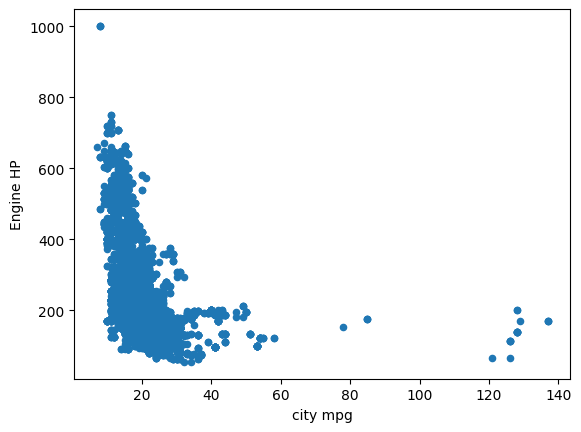

In [157]:
# Scatterplot
car_data.plot.scatter(x="city mpg", y="Engine HP");

## Exploring Two or More Variables

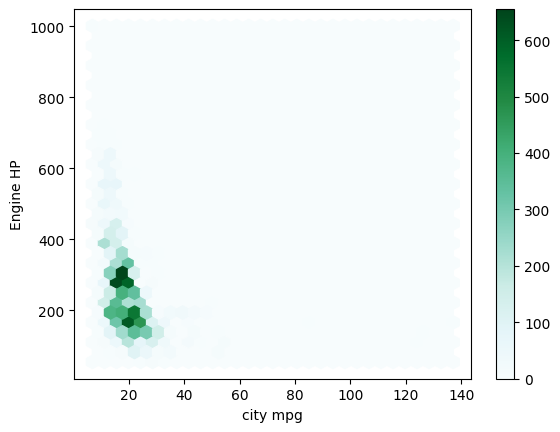

In [166]:
# Hexagonal Binning
car_data.plot.hexbin(x="city mpg", y="Engine HP", gridsize=30);

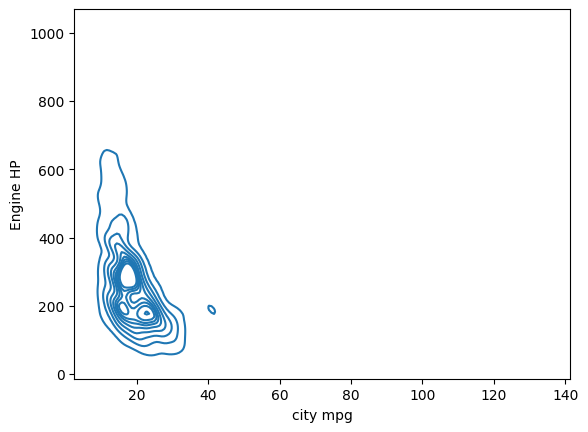

In [169]:
# Contour plot
sns.kdeplot(x="city mpg", y="Engine HP", data=car_data);

In [196]:
# Contingency table
car_data[["Transmission Type", "Vehicle Size"]].pivot_table(
    index="Transmission Type", columns="Vehicle Size", aggfunc=len
)

Vehicle Size,Compact,Large,Midsize
Transmission Type,,,
AUTOMATED_MANUAL,416,38,172
AUTOMATIC,2124,2464,3678
DIRECT_DRIVE,45,18,5
MANUAL,2173,249,513
UNKNOWN,6,8,5


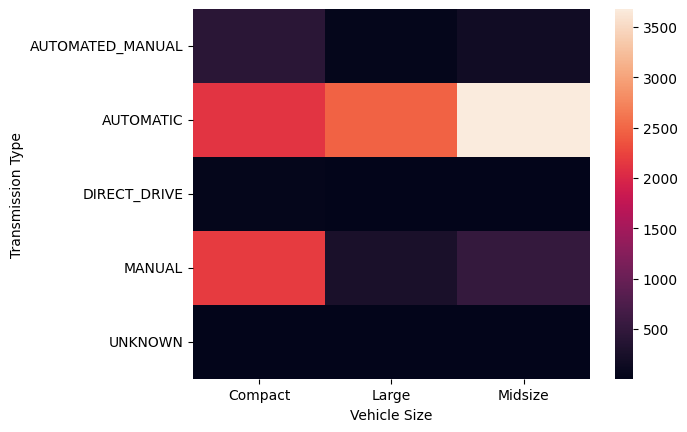

In [198]:
# Heat map of contingency table
sns.heatmap(car_data[["Transmission Type", "Vehicle Size"]].pivot_table(
    index="Transmission Type", columns="Vehicle Size", aggfunc=len
));

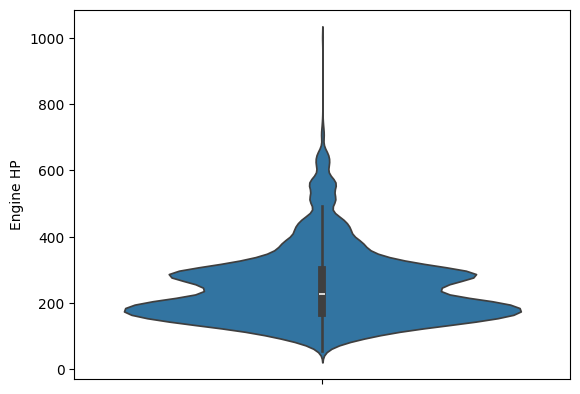

In [202]:
# Violin plot
sns.violinplot(car_data["Engine HP"]);

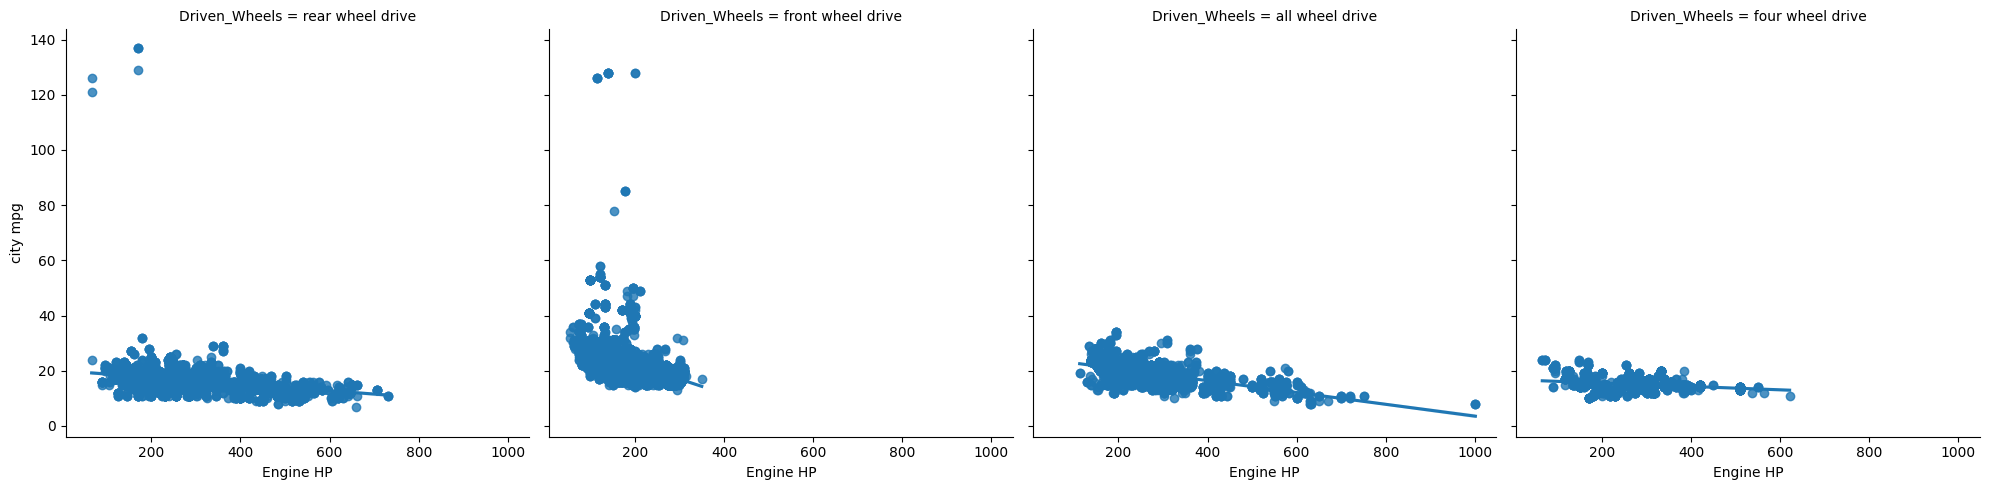

In [213]:
# Conditioning plot
sns.lmplot(y="city mpg", x="Engine HP", col="Driven_Wheels", data=car_data);